# Further Time Series Analysis

In [2]:
from datetime import datetime
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
import matplotlib.dates as mdates
%matplotlib inline 

## Analysing Existing Time Series Data

To begin this notebook, we will work with existing time series data from the US Energy Information Administration which lists Brent crude oil prices over several decades. Prices are given in dollars per barrel, and dates are in the format DD/MM/YYYY.

First, load the data from a remote CSV file into a Pandas DataFrame. Again, we will need a custom date parser to extract the dates. We will use the dates as the row index for the DataFrame. Note that we tell Pandas to parse the *Date* column and we indicate that the format has the "day first".

In [4]:
df = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/oil.csv", 
    parse_dates=['Date'], index_col="Date", dayfirst=True)

First, sort the data by date (i.e. by the DataFrame's index):

In [6]:
df = df.sort_index()
df.tail(5)

,Price
Date,
2022-07-26,107.32
2022-07-27,109.64
2022-07-28,109.68
2022-07-29,111.51
2022-08-01,106.09


We can look at the date range for the series:

In [8]:
dmin, dmax = df.index.min(), df.index.max()
dmin, dmax

(Timestamp('1987-05-20 00:00:00'), Timestamp('2022-08-01 00:00:00'))

First, we will plot the entire time series:

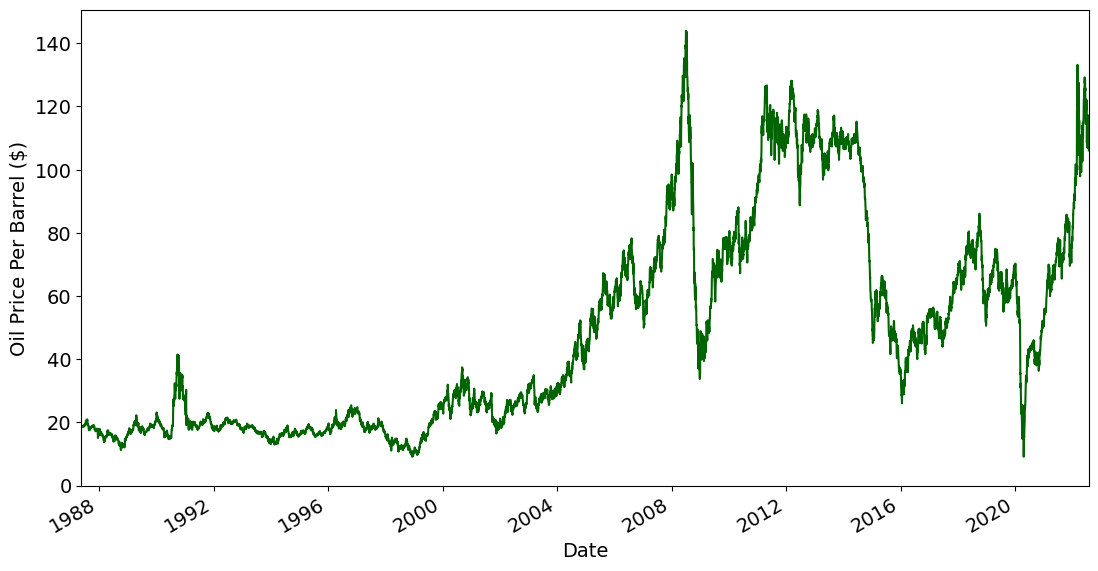

In [10]:
ax = df["Price"].plot(figsize=(13,7), color="darkgreen", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Oil Price Per Barrel ($)", fontsize=14);
# ensure the y-axis starts at 0
ax.set_ylim(0)
# only include the exact time period of the data
ax.set_xlim(dmin, dmax);

We will focus on the data from 2000 onwards. We can use slicing to access that portion of the series.

In [12]:
df2 = df.loc["2000-01-01":]
# check the range
dmin2, dmax2 = df2.index.min(), df2.index.max()
dmin2, dmax2

(Timestamp('2000-01-04 00:00:00'), Timestamp('2022-08-01 00:00:00'))

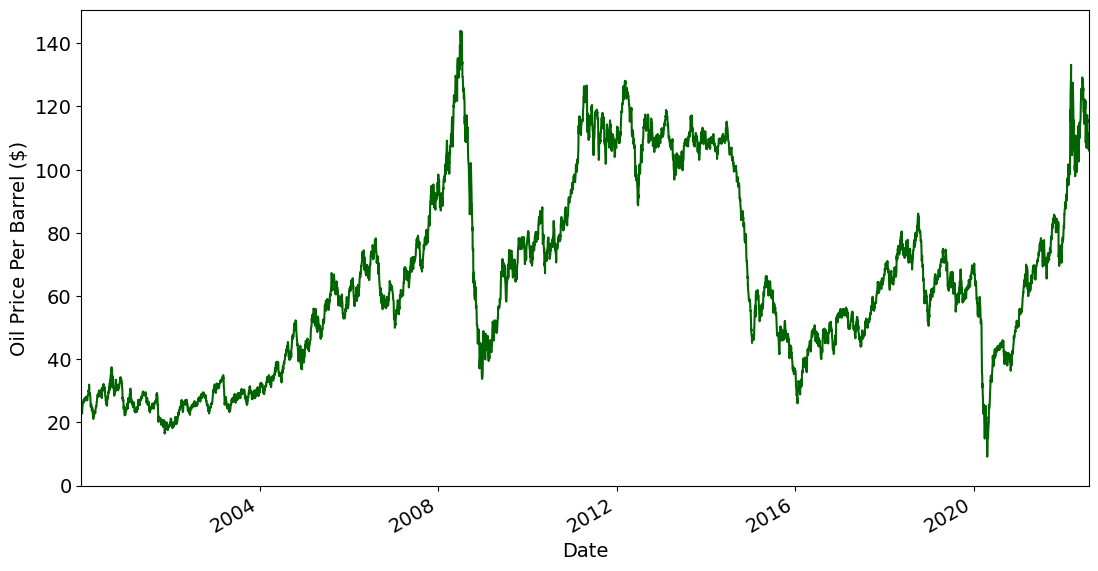

In [14]:
ax = df2["Price"].plot(figsize=(13,7), color="darkgreen", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Oil Price Per Barrel ($)", fontsize=14);
# ensure the y-axis starts at 0
ax.set_ylim(0)
# only include the exact time period of the data
ax.set_xlim(dmin2, dmax2);

Currently the data is based on weekly oil prices. We can roll this up to a monthly level, by taking the mean of the values in each month using the Pandas *groupby()* function.

In [18]:
groups = df2.groupby(pd.Grouper(freq='ME'))
df3 = groups.agg({'Price':'mean'})
df3.head(10)

,Price
Date,
2000-01-31,25.511000
2000-02-29,27.775714
2000-03-31,27.486087
2000-04-30,22.764444
2000-05-31,27.737619
2000-06-30,29.795455
2000-07-31,28.682381
2000-08-31,30.196087
2000-09-30,33.144762


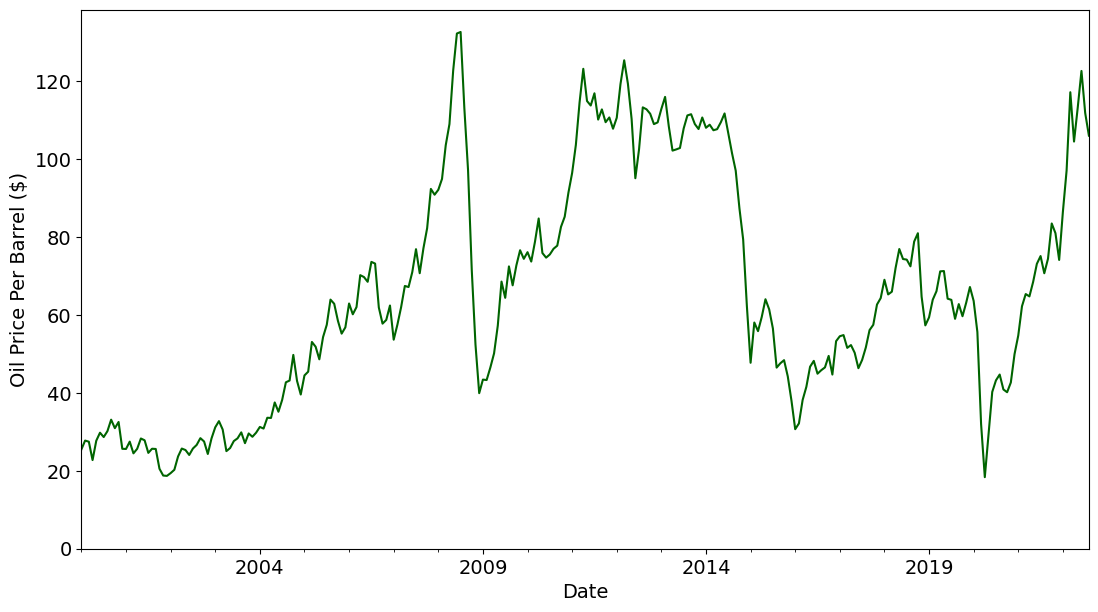

In [20]:
ax = df3["Price"].plot(figsize=(13,7), color="darkgreen", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Oil Price Per Barrel ($)", fontsize=14);
# ensure the y-axis starts at 0
ax.set_ylim(0)
# only include the exact time period of the data
ax.set_xlim(dmin2, dmax2);

When exactly were the peaks in the time series?

In [22]:
df3.sort_values(by="Price", ascending=False).head(10)

,Price
Date,
2008-07-31,132.718182
2008-06-30,132.322381
2012-03-31,125.445455
2011-04-30,123.258889
2008-05-31,122.797143
2022-06-30,122.710952
2012-04-30,119.421667
2012-02-29,119.327000
2022-03-31,117.245217


And where were the troughs in the time series?

In [25]:
df3.sort_values(by="Price").head(10)

,Price
Date,
2020-04-30,18.378500
2001-12-31,18.705263
2001-11-30,18.797273
2002-01-31,19.416818
2002-02-28,20.275500
2001-10-31,20.537826
2000-04-30,22.764444
2002-03-31,23.696667
2002-06-30,24.081667


## Moving Averages

To get a better view of the trend in oil prices, we will use a 6-month (half yearly) rolling mean to smooth the data:

In [27]:
rm6 = df3.rolling(6).mean()
rm6.head(10)

,Price
Date,
2000-01-31,NaN
2000-02-29,NaN
2000-03-31,NaN
2000-04-30,NaN
2000-05-31,NaN
2000-06-30,26.845053
2000-07-31,27.373617
2000-08-31,27.777012
2000-09-30,28.720125


Note that we do not have values for the first 5 months, as the 6-month mean can only be calculated at the third month. We can remove these from the data.

In [29]:
rm6 = rm6.loc["2000-06-30":]
rm6.head()

,Price
Date,
2000-06-30,26.845053
2000-07-31,27.373617
2000-08-31,27.777012
2000-09-30,28.720125
2000-10-31,30.086202


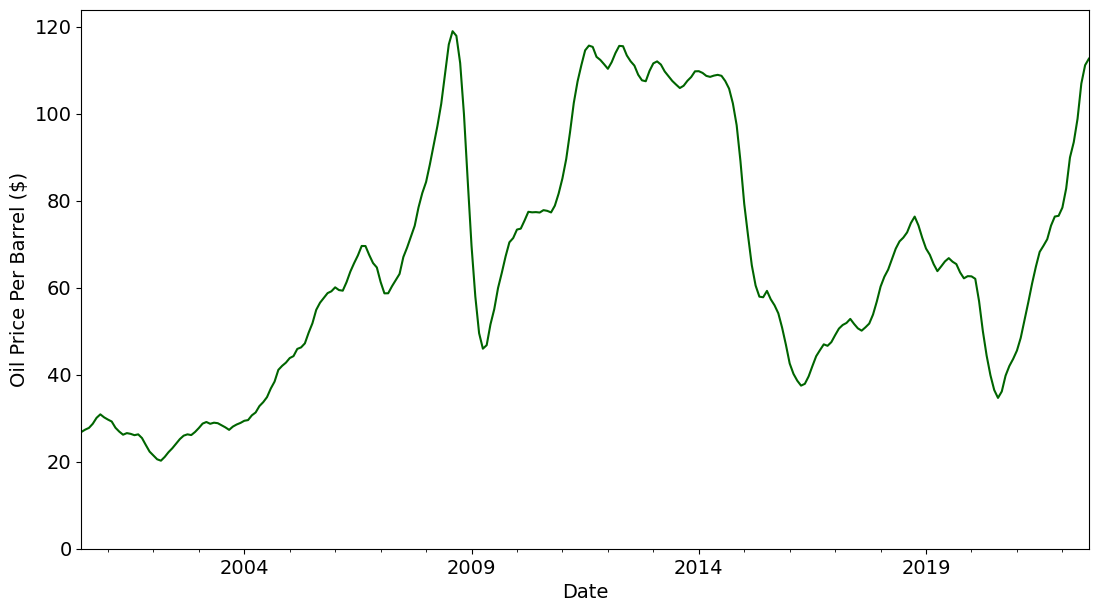

In [31]:
ax = rm6["Price"].plot(figsize=(13,7), color="darkgreen", fontsize=14)
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Oil Price Per Barrel ($)", fontsize=14);
# ensure the y-axis starts at 0
ax.set_ylim(0)
# only include the exact time period of the rolling average data
ax.set_xlim("2000-06-30", dmax2);

We could also generate series of rolling averages, with different window sizes, and compare it to the raw monthly data.

In [33]:
raw = df3["Price"]
raw.name = "Raw Data"

In [35]:
# compute the 6 month rolling average
rm6 = raw.rolling(6).mean()
rm6.name = "6-month Average"

In [37]:
# compute the 24 month rolling average
rm24 = raw.rolling(24).mean()
rm24.name = "24-month Average"

In [39]:
# merge the three series to create a new DataFrame
dfb = pd.concat([raw, rm6, rm24], axis=1)
dfb.head(10)

,Raw Data,6-month Average,24-month Average
Date,,,
2000-01-31,25.511000,NaN,NaN
2000-02-29,27.775714,NaN,NaN
2000-03-31,27.486087,NaN,NaN
2000-04-30,22.764444,NaN,NaN
2000-05-31,27.737619,NaN,NaN
2000-06-30,29.795455,26.845053,NaN
2000-07-31,28.682381,27.373617,NaN
2000-08-31,30.196087,27.777012,NaN
2000-09-30,33.144762,28.720125,NaN


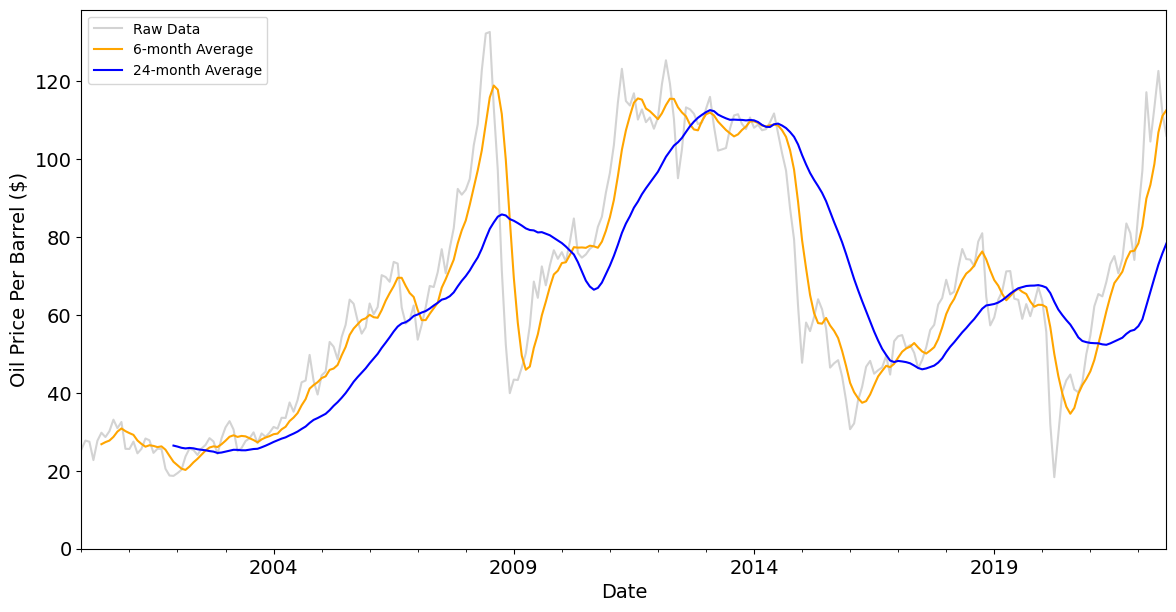

In [41]:
ax = dfb.plot(figsize=(14, 7), fontsize=14, color=["lightgray","orange", "blue"])
ax.set_xlabel("Date", fontsize=14)
ax.set_ylabel("Oil Price Per Barrel ($)", fontsize=14);
ax.set_ylim(0);

## Creating Time Series from Data

In some cases we will have data containing rows, where each row has a date or timestamp. In this case we might have multiple rows which have the same date (e.g. multiple visits to a website on the same day, multiple purchases made on the same day). It can be useful to create a time series from this data based on counts for the dates.

To demonstrate this, we will work with a dataset containing website log data. Here each row indicates a visit to a different website at a different time. We might be interested in the number of visits or "hits" for the website each day. We could create a time series showing this data.

First, load the data from a remote CSV file into a Pandas DataFrame. In this case we will parse the field *Timestamp*, and set it as the index of our DataFrame.

In [ ]:
df_web = pd.read_csv("http://mlg.ucd.ie/modules/COMP41680/website-log.csv", 
                 parse_dates=["Timestamp"], index_col="Timestamp")
df_web.head(10)

If we want to count the number of hits per day, we need to resample the time series to a daily frequency and then look at the frequency per day using the *size()* function:

In [ ]:
# resample by day (D) and use size to count the rows for each day
daily_visits = df_web.resample('D').size()
daily_visits

In [ ]:
# create the plot
p = daily_visits.plot(figsize=(9, 4.5), fontsize=13, 
    style="-o", color="darkblue", markerfacecolor="red", markersize=8)
# customise the axis labels
p.set_xlabel("Date", fontsize=13)
p.set_ylabel("Number of Visits", fontsize=13);